# 10주차 모델 평가와 선택
### 교차검증(cross validation)
### 모델 최적화(hyperparameter tuning)
### 예측 성능 지표performance metrics)

In [27]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

from IPython.display import Image
width=600; height=500

## 분산과 편향
     
https://en.wikipedia.org/wiki/Bias%E2%80%93variance_tradeoff

### Polynomial regression

In [44]:
import numpy.random as rnd
np.random.seed(42)

Text(0.5, 0, '$x_1$')

Text(0, 0.5, '$y$')

(-3.0, 3.0, 0.0, 10.0)

Text(0.5, 1.0, 'quadratic_data_plot')

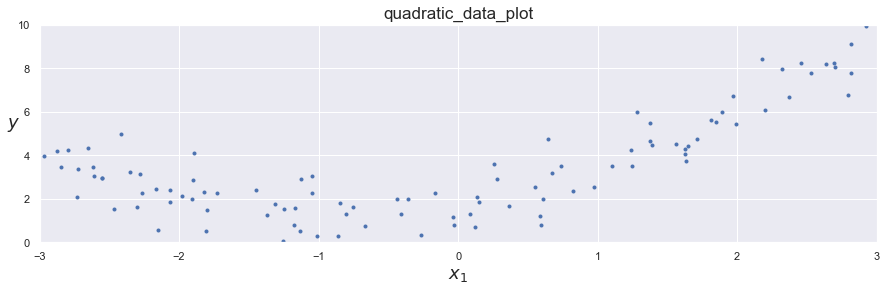

In [45]:
sns.set()
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

plt.rcParams["figure.figsize"] = (15,4)
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.title("quadratic_data_plot", fontsize=17)
plt.show()

In [49]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0:5]
X_poly[0:5]

array([[-0.75275929],
       [ 2.70428584],
       [ 1.39196365],
       [ 0.59195091],
       [-2.06388816]])

array([[-0.75275929,  0.56664654],
       [ 2.70428584,  7.3131619 ],
       [ 1.39196365,  1.93756281],
       [ 0.59195091,  0.35040587],
       [-2.06388816,  4.25963433]])

In [50]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

LinearRegression()

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

Text(0.5, 0, '$x_1$')

Text(0, 0.5, '$y$')

(-3.0, 3.0, 0.0, 10.0)

Text(0.5, 1.0, 'quadratic_data & predictions_plot')

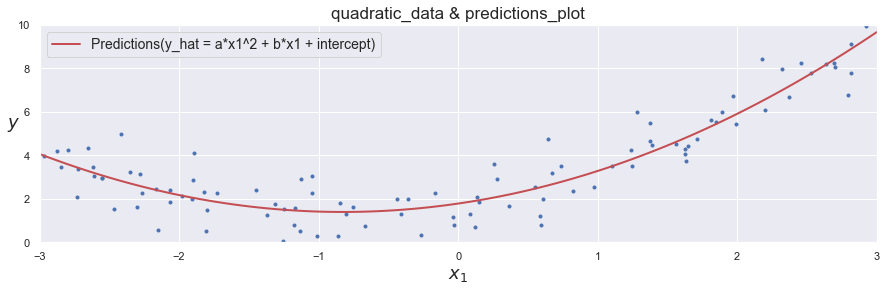

In [51]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions(y_hat = a*x1^2 + b*x1 + intercept)")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.title("quadratic_data & predictions_plot", fontsize=17)
plt.show()

### <font color='blue'> 2차 함수인 경우가 fit가 잘 되고 있음

Text(0.5, 0, '$x_1$')

Text(0, 0.5, '$y$')

(-3.0, 3.0, 0.0, 10.0)

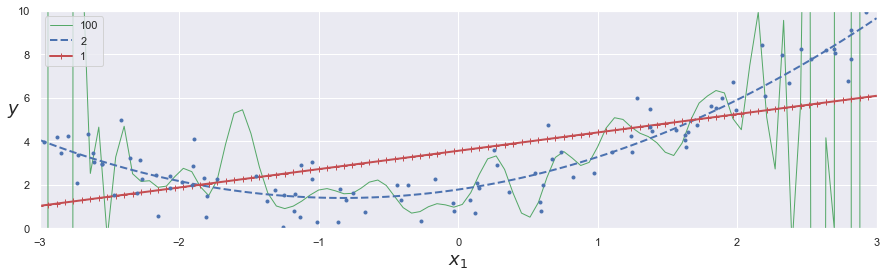

In [52]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 100), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
   
    y_newbig =  polynomial_regression.fit(X, y).predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

In [53]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)              # not shown

## Underfitting (Low complexity model)

(0.0, 80.0, 0.0, 3.0)

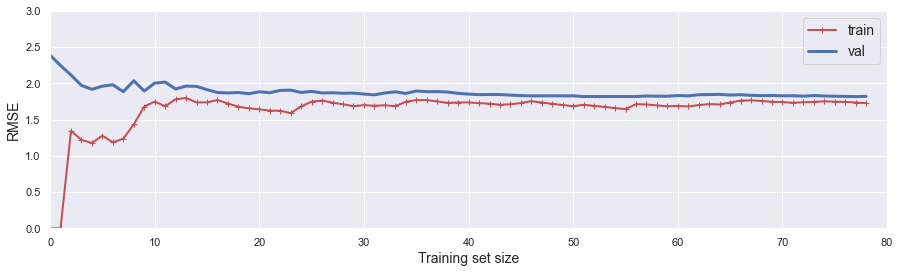

In [54]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])                         # not shown in the book
plt.show()   

### <font color='red'> Underfitting (High biased) : 2 개의 곡선이 uniform 해지면서 서로 가까워지고(converge) 에러(RMSE)가 상당히 높다
#### 훈련데이터 : 처음 2개까지는 RMSE는 '0'이나 데이터가 증가하여도 더 이상 개선되지 않음
#### 검증데이터 : 처음에는 일반화하지 못하다가 감소하는 추세를 보였지만 데이터가 증가하여도 더 이상 개선되지 않음
### <font color='blue'> Underfitting 해결방법은 모델을 변경하는 것 ! 

## Overfitting (High complexity model)

(0.0, 80.0, 0.0, 3.0)

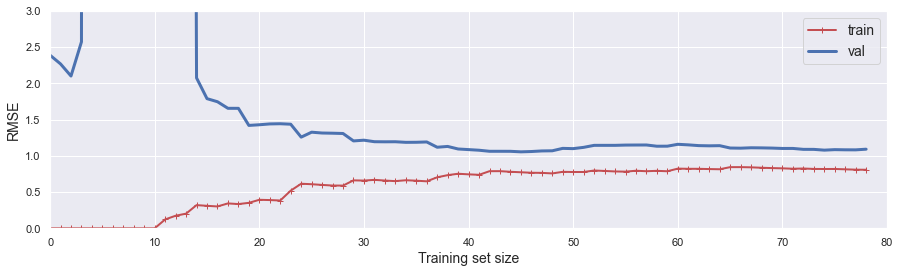

In [10]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])           # not shown
plt.show()                        # not shown

### <font color='red'> Overfitting (High variance) : 2 개의 곡선이 서로 가까워지려고 하고 에러(RMSE)가 비교적 낮다.
#### 훈련데이터 : low complexity 모델보다 에러(RMSE)가 비교적 아주 낮다.
#### 검증데이터 : 훈련과 검증데이터의 gap이 엄청 크고 훈련데이터에서는 에러가 검증데이터보다 훨씬 적다. 데이터가 증가하면 에러가 줄어 성능이 개선될 것임
    
### <font color='blue'> Overfitting 해결방법은 Regularization이다.

## The Bias/Variance Tradeoff
- An important theoretical result of statistics and Machine Learning is the fact that a model’s generalization error can be expressed as the sum of three very different
errors:

### 1. Bias
- This part of the generalization error is due to wrong assumptions, such as assuming that the data is linear when it is actually quadratic. A high-bias model is most
likely to underfit the training data.

### 2. Variance
- This part is due to the model’s excessive sensitivity to small variations in the training data. A model with many degrees of freedom (such as a high-degree polynomial
model) is likely to have high variance, and thus to overfit the training data.

### 3. Irreducible error
- This part is due to the noisiness of the data itself. The only way to reduce this part of the error is to clean up the data (e.g., fix the data sources, such as broken
sensors, or detect and remove outliers).

Increasing a model’s complexity will typically increase its variance and reduce its bias. Conversely, reducing a model’s complexity increases its bias and reduces its variance.
This is why it is called a tradeoff.

# 편향과 분산에 대하여

- 편향(Bias)은 가정 사항을 단순화시켜 예측을 쉽게 하는 것을 의미하며, 분산(Variance)은 훈련데이터의 변화에 대한 모델의 민감도이다. 
- 모델의 편향이 높아지면 분산은 낮아지게 되는 반비례 관계이다. Parametric 알고리즘은 매핑 함수에 대한 가정 사항으로 편향이 낮고 분산이 높은 경향이 있다. 
- 머신러닝의 궁극적인 목적은 편향과 분산을 동시에 낮추는 것이다. 

- 모델의 분산이 높은 것은 과거 자료에 대해 지나친 학습을 통해 일반화하지 못하고 자료를 모델에 특정화시켜 새로운 데이터를 예측하지 못한 경우로 모델이 과적합(Overfitting)되었다고 한다. 
     * 과적합은 분산은 높고 편향이 낮다. 
     * 과거의 구체적인 자료로부터 를 탐색한다는 것은, 구체적인 자료를 일반화하여(generalization) 모델(model)을 만들어 새로운 입력 자료를 예측하는 것이다. 

- 모델은 과적합과 Underfitting의 문제가 발생한다. Underfitting이 발생하면 예측 성능이 낮아서 다른 알고리즘을 탐색하여 해결할 수 있다. 
     * 과적합은 알고리즘이 자료를 학습하는 동안 자료의 noise도 일반화하여 모델에 반영한 경우이다. 
     * 과적합을 해결하는 방법은 교차검증, 훈련과 시험 이외 검증데이터를 준비하여 예측 결과를 확인하는 것이다. 
     * 일반적으로 Non parametric과 Non linear 알고리즘은 유연하므로 과적합 발생 가능성이 크다. 따라서 알고리즘 대부분은 과적합을 낮추려고 하고 있다. 

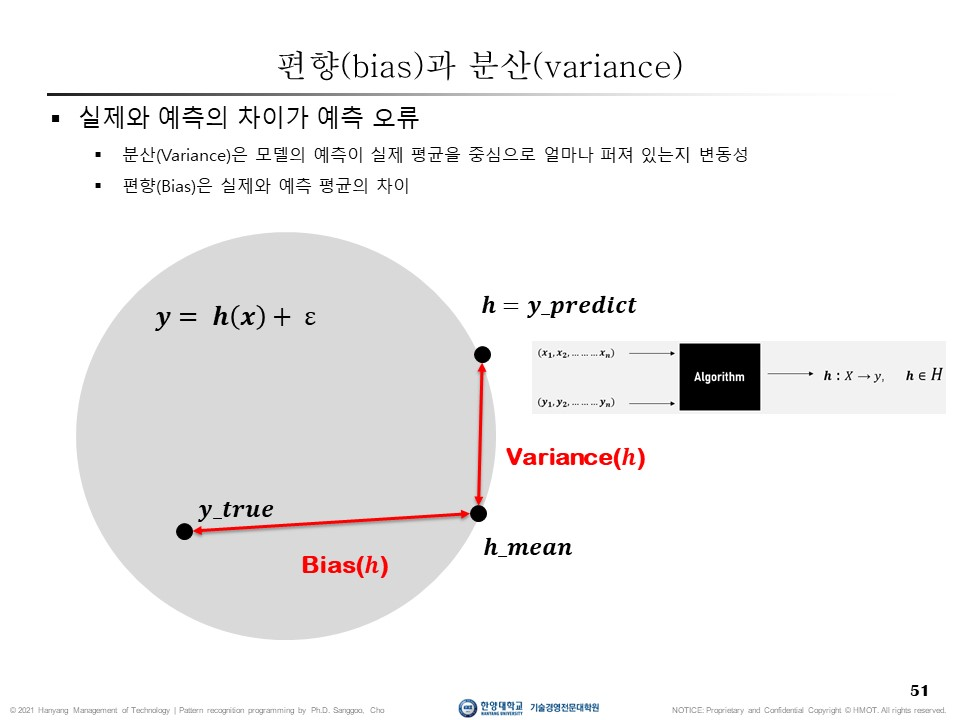

In [28]:
Image(filename='../image/cv/슬라이드51.jpg', width=width, height=height)

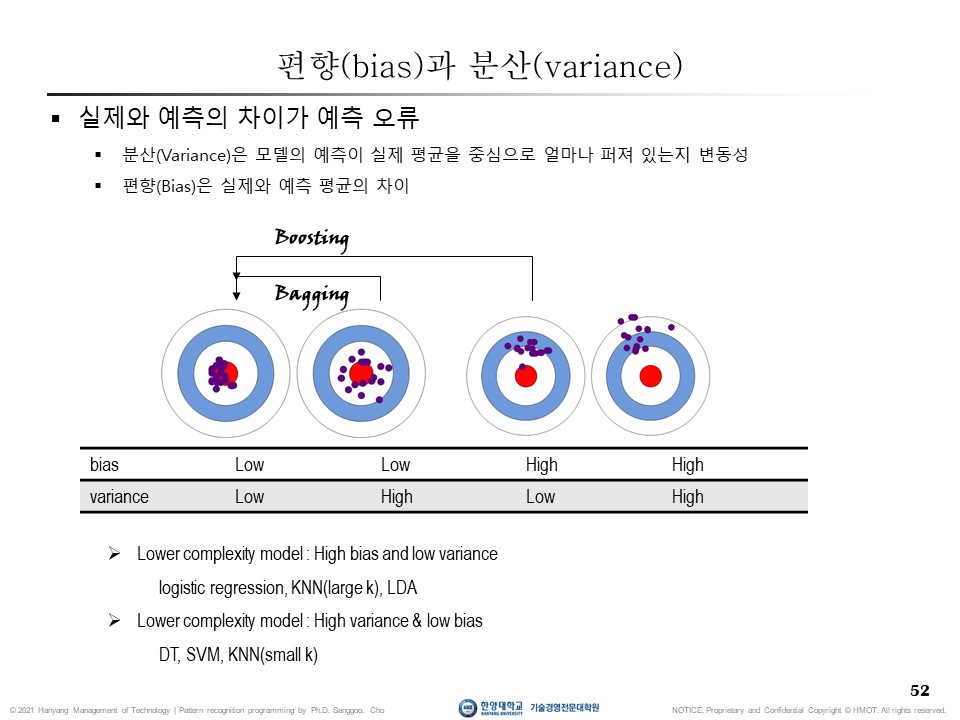

In [29]:
Image(filename='../image/cv/슬라이드52.jpg', width=width, height=height)

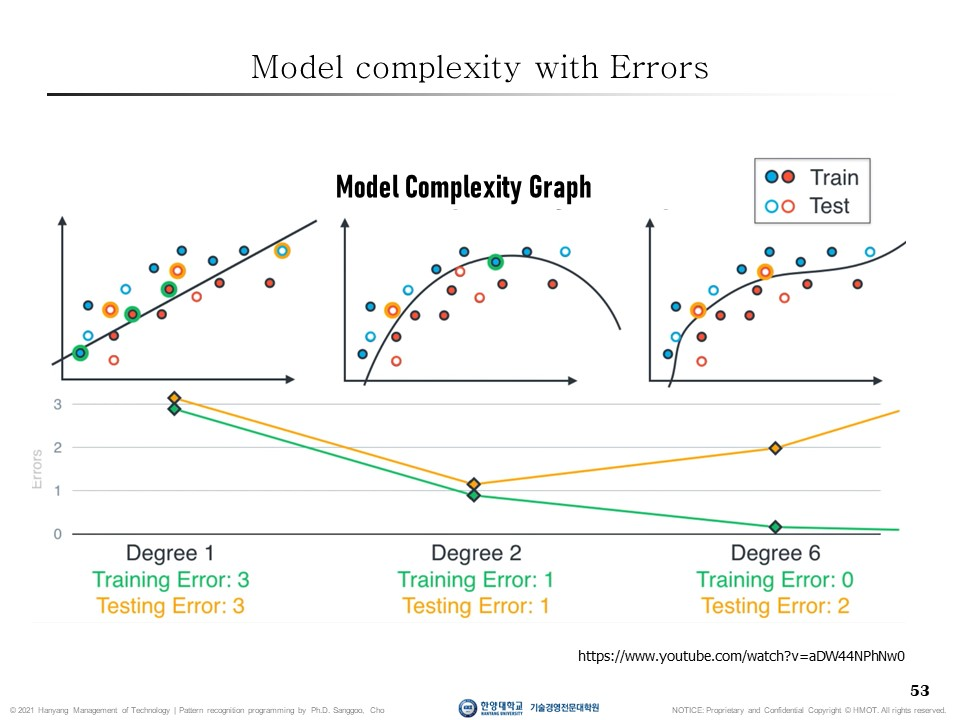

In [30]:
Image(filename='../image/cv/슬라이드53.jpg', width=width, height=height)

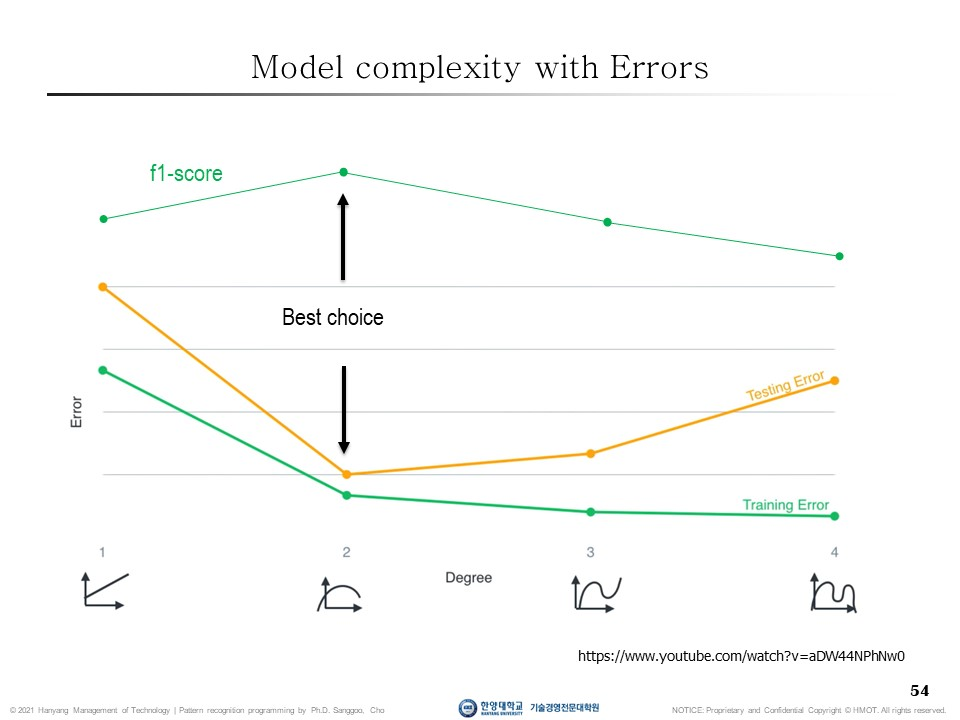

In [31]:
Image(filename='../image/cv/슬라이드54.jpg', width=width, height=height)

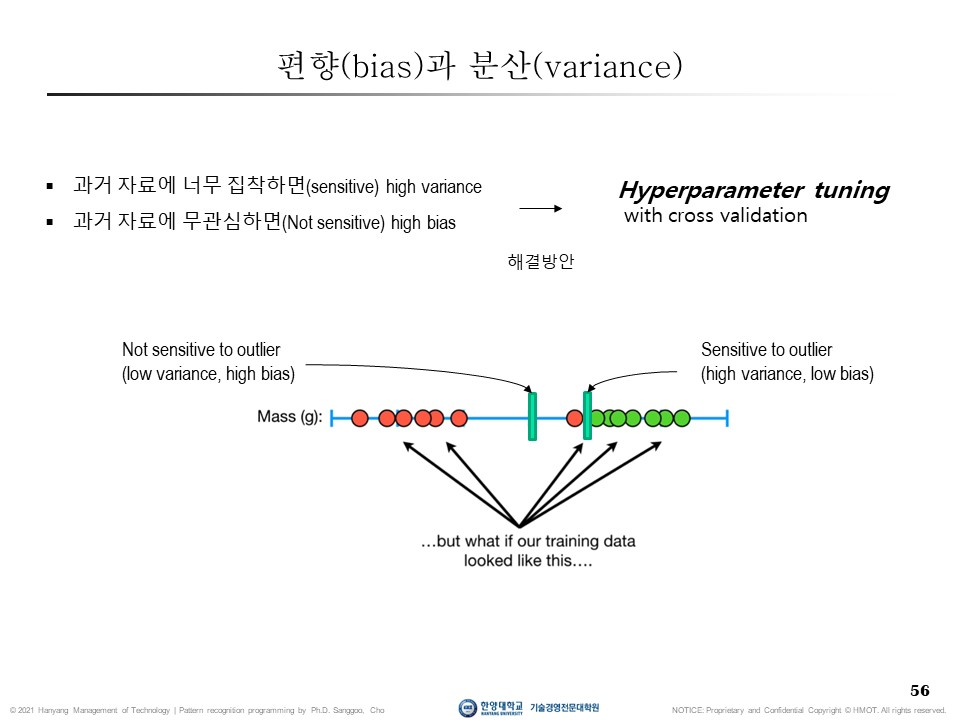

In [32]:
Image(filename='../image/cv/슬라이드56.jpg', width=width, height=height)

## 손실함수(Loss function)

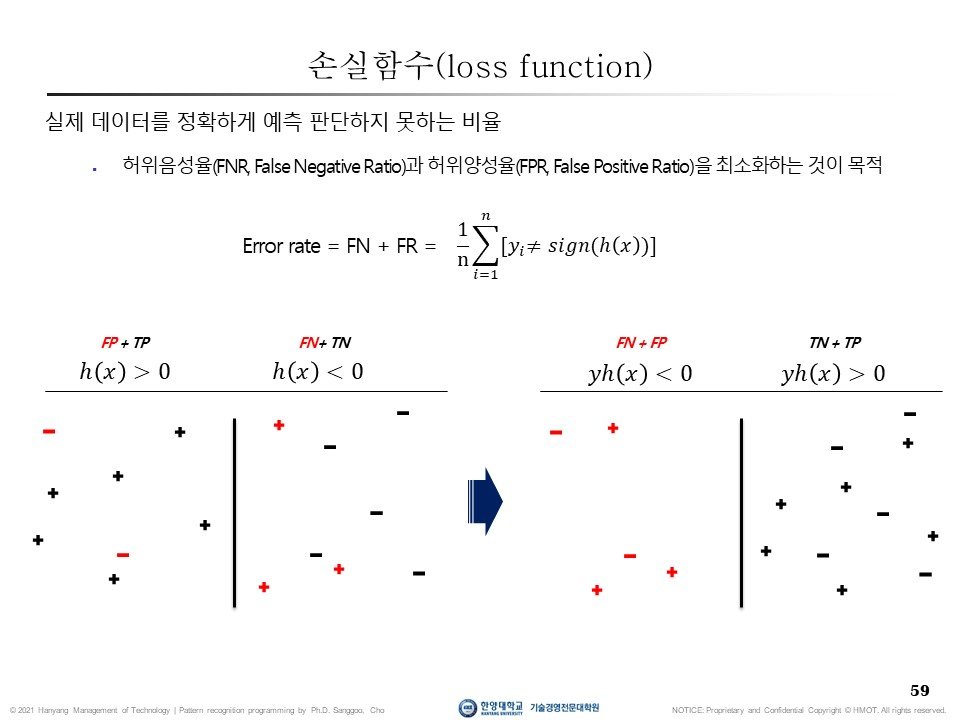

In [33]:
Image(filename='../image/cv/슬라이드59.jpg', width=width, height=height)

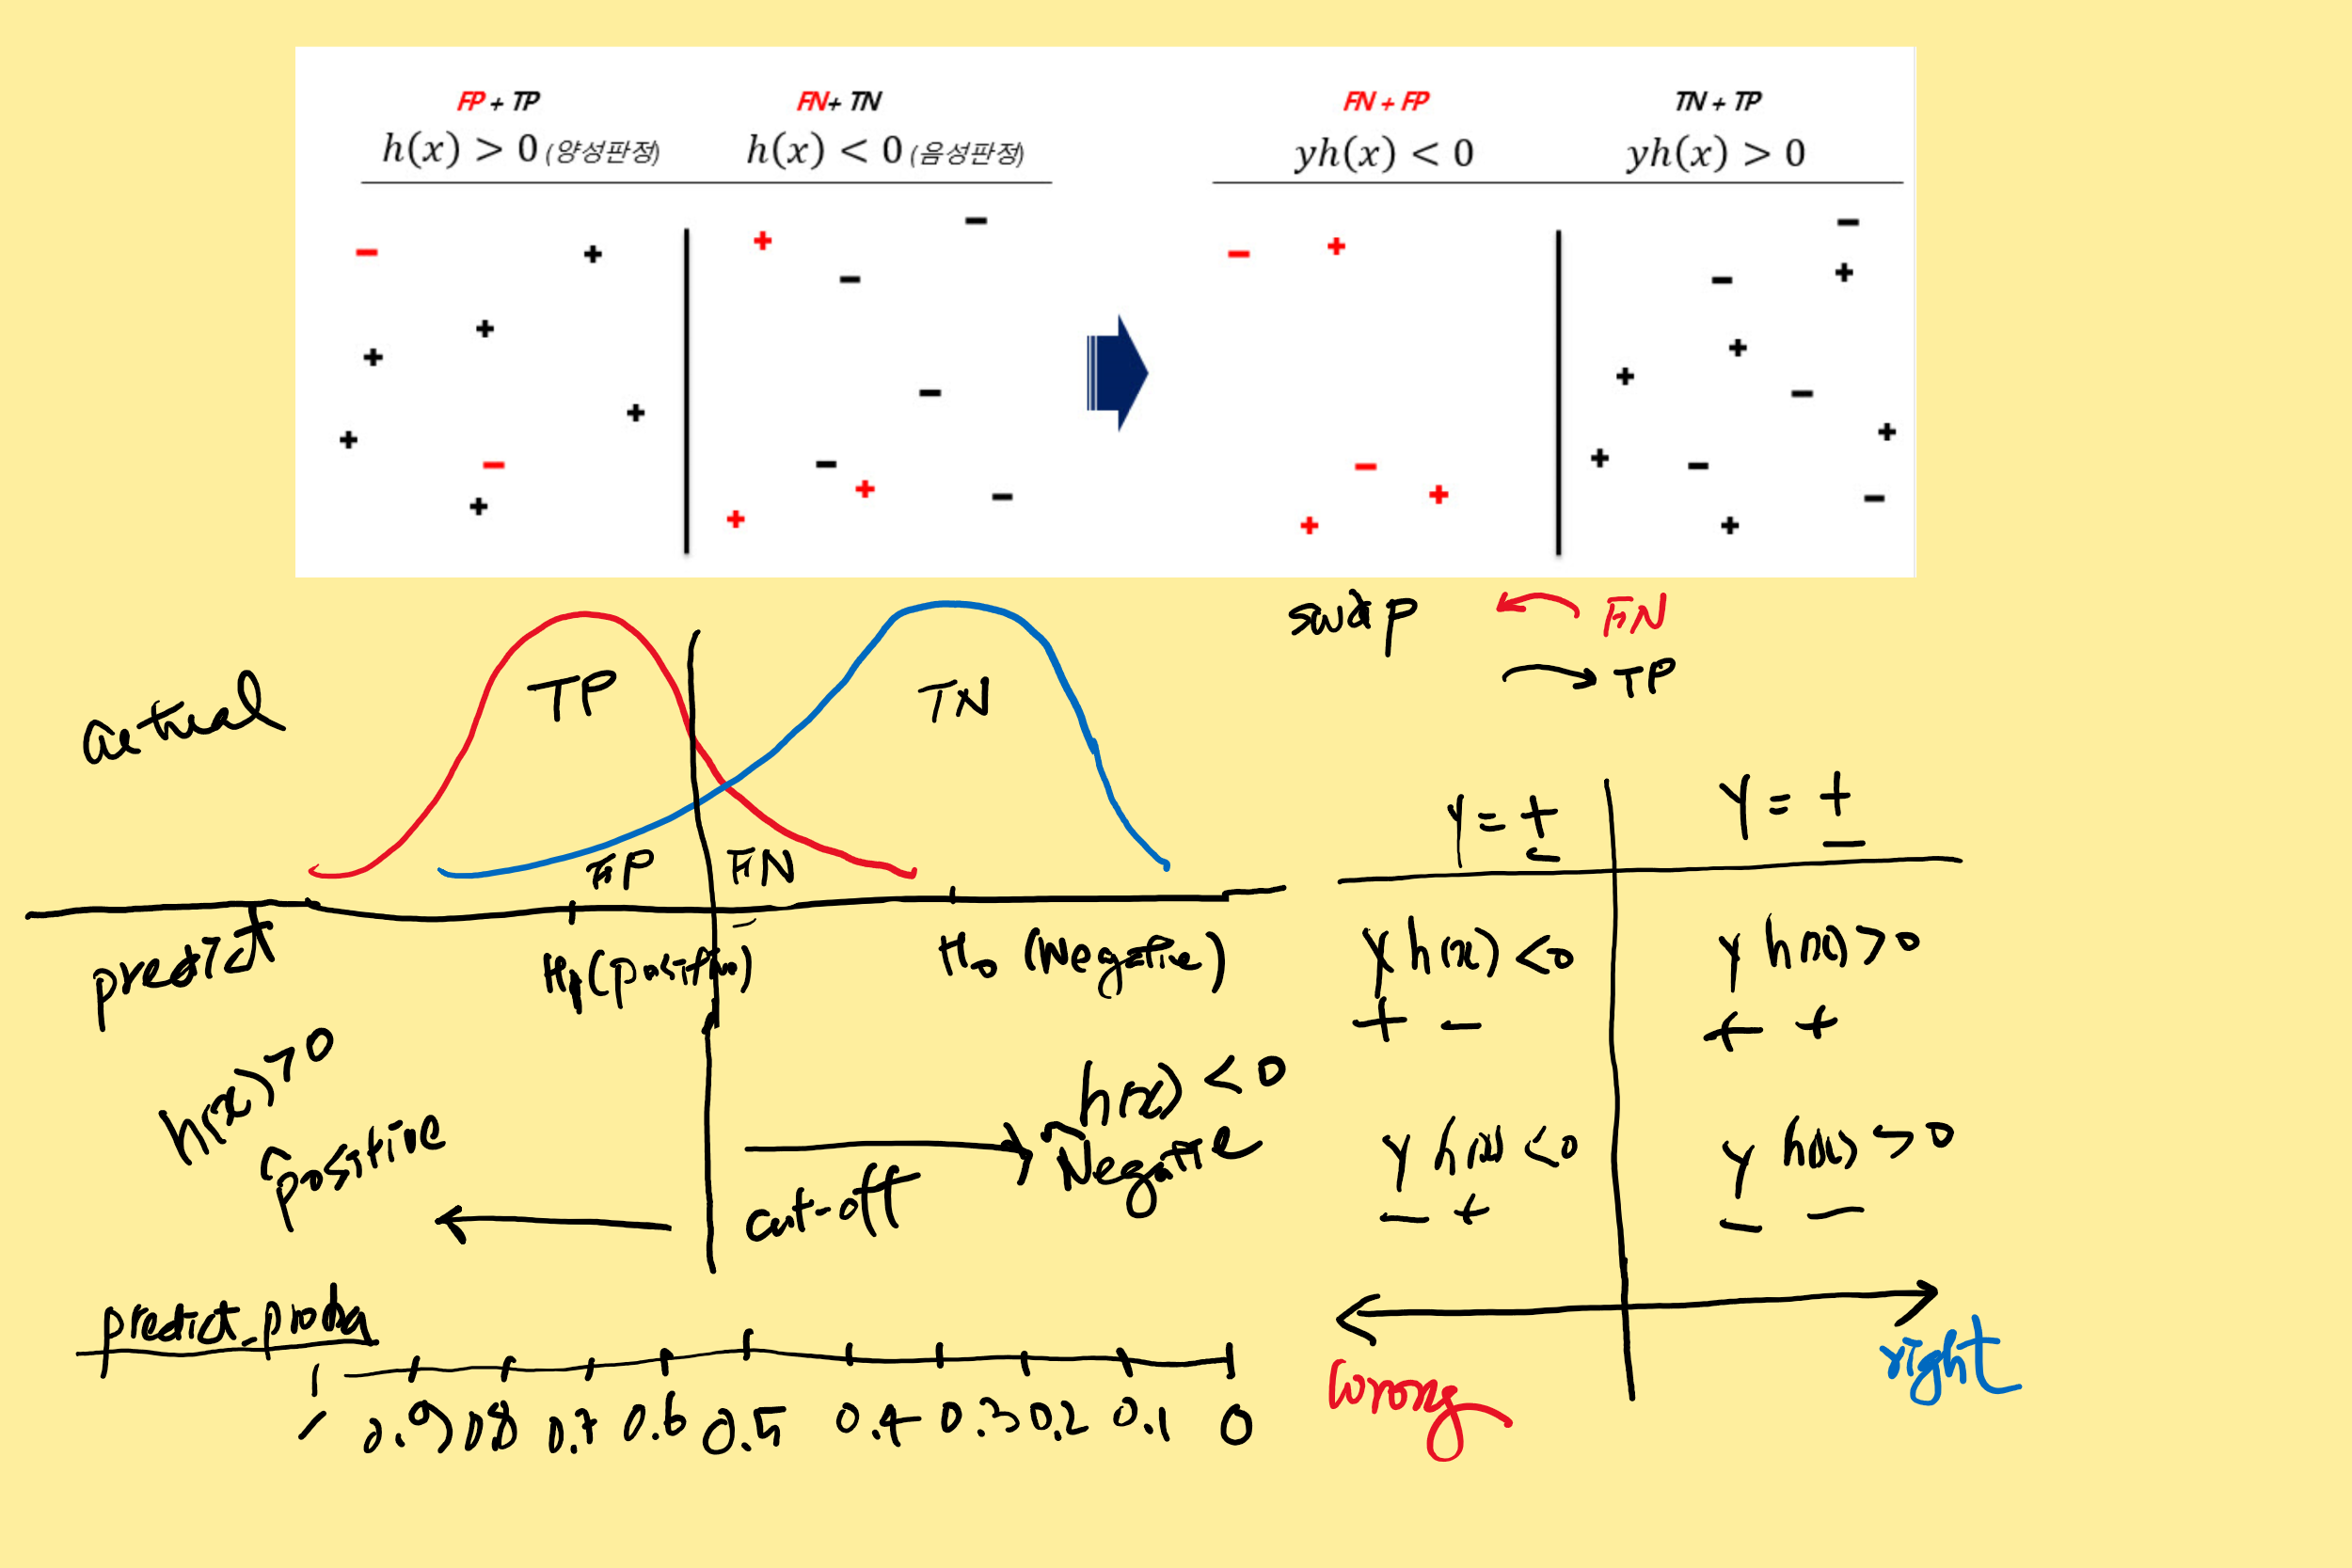

In [34]:
Image(filename='../image/cv/loss fct.png', width=width, height=height)

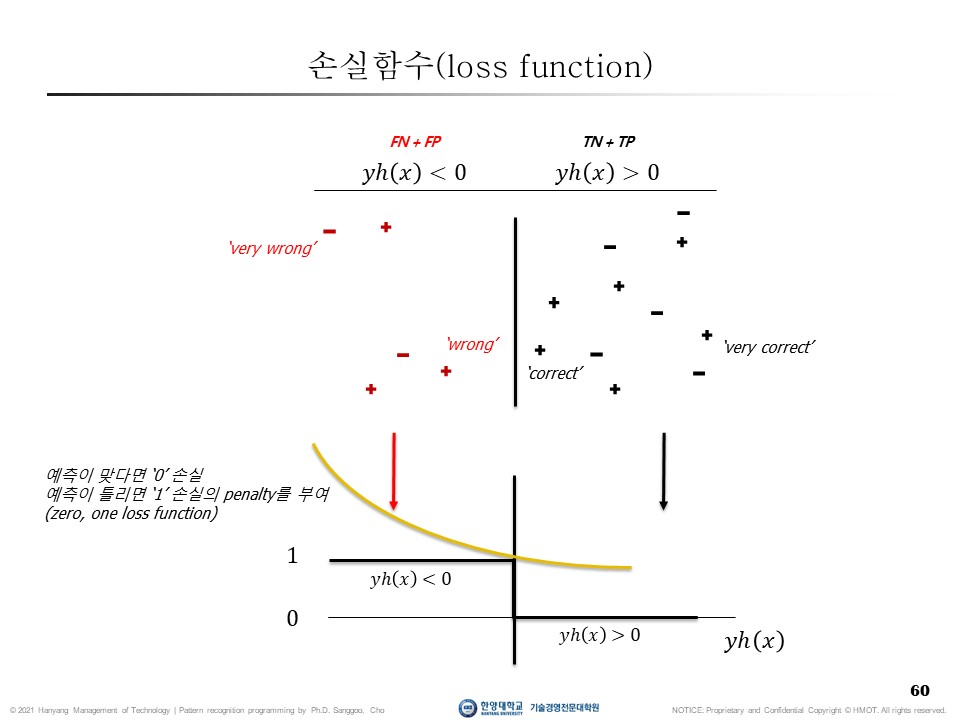

In [35]:
Image(filename='../image/cv/슬라이드60.jpg', width=width, height=height)

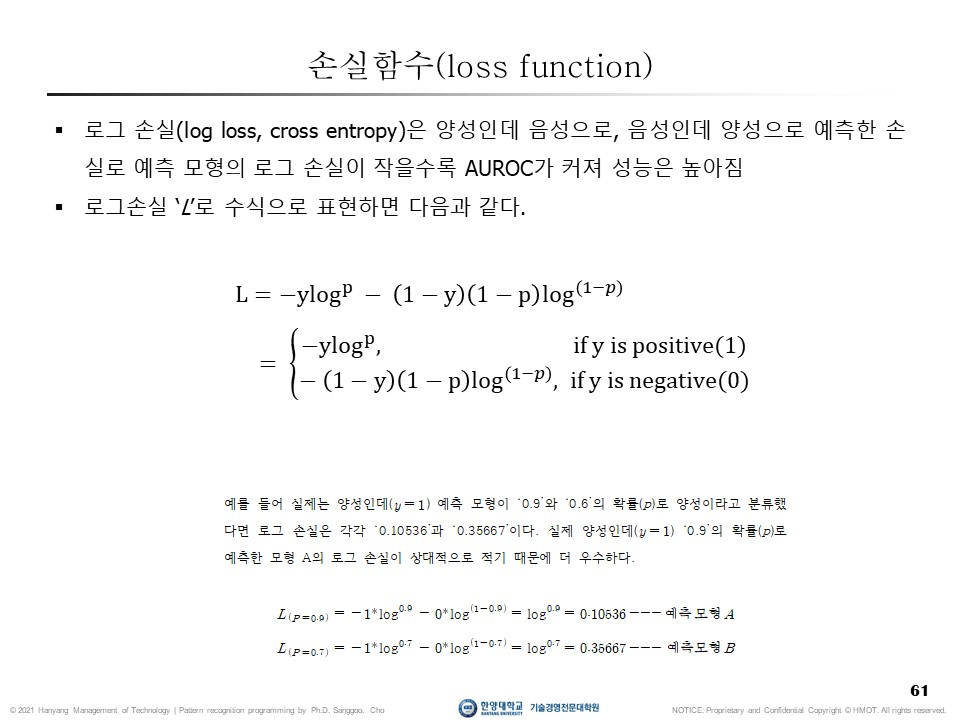

In [36]:
Image(filename='../image/cv/슬라이드61.jpg', width=width, height=height)

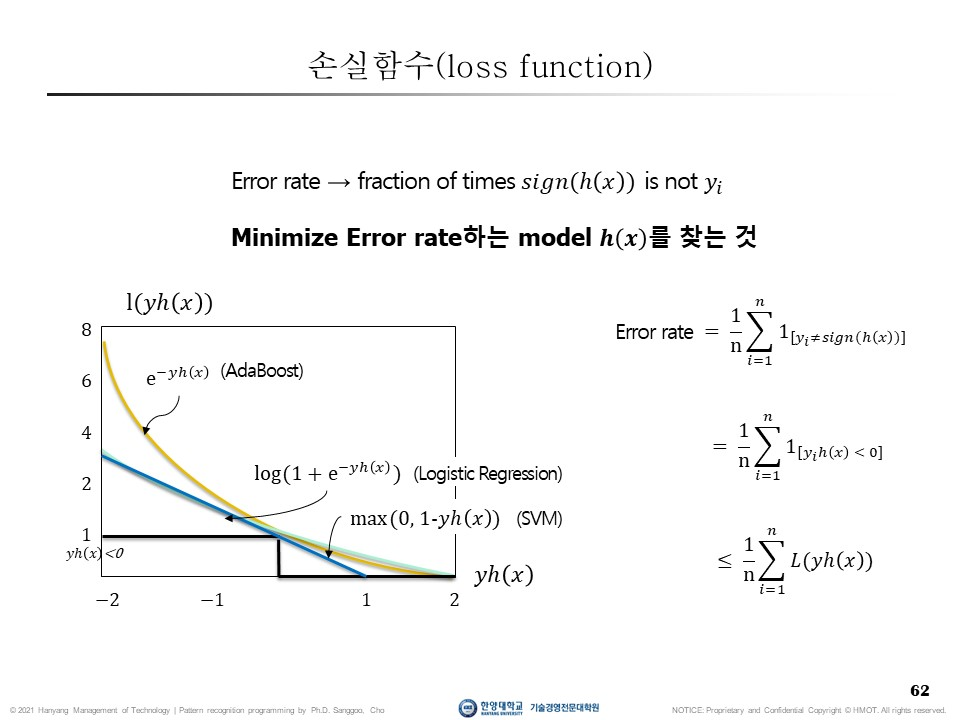

In [37]:
Image(filename='../image/cv/슬라이드62.jpg', width=width, height=height)

(0.0, 8.0)

Text(0.5, 0, 'Decision function $f(x)$')

Text(0, 0.5, '$L(y=1, f(x))$')

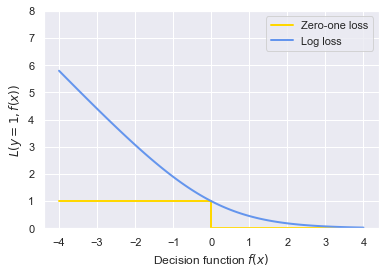

In [38]:
xmin, xmax = -4, 4
xx = np.linspace(xmin, xmax, 100)

lw = 2
plt.plot([xmin, 0, 0, xmax], [1, 1, 0, 0], color='gold', lw=lw,
         label="Zero-one loss")

plt.plot(xx, np.log2(1 + np.exp(-xx)), color='cornflowerblue', lw=lw,
         label="Log loss")

plt.ylim((0, 8))
plt.legend(loc="upper right")
plt.xlabel(r"Decision function $f(x)$")
plt.ylabel("$L(y=1, f(x))$")
plt.show()

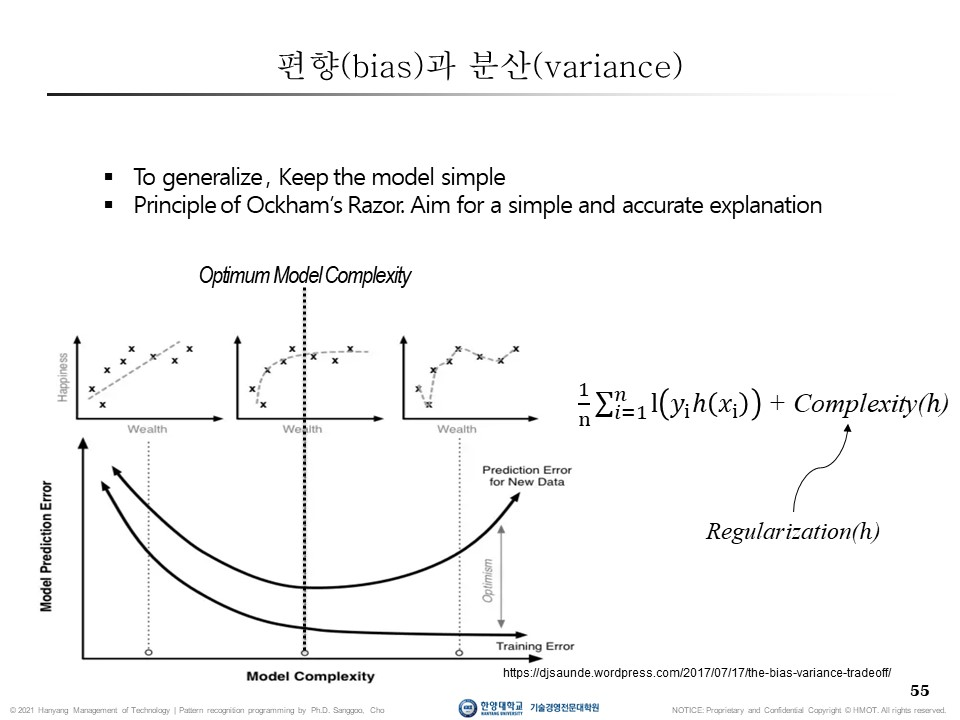

In [39]:
Image(filename='../image/cv/슬라이드55.jpg', width=width, height=height)

### <font color='blue'> Overfitting 된 모델의 해결방법은 Regularization이다. 
### Roughly speaking, 머신러닝은 High variance를 갖는 복잡한 모델을 regularization하는 것이다.
- Underfitting된 모델대신 복잡한 모델을 찾은 후 regularization한다.

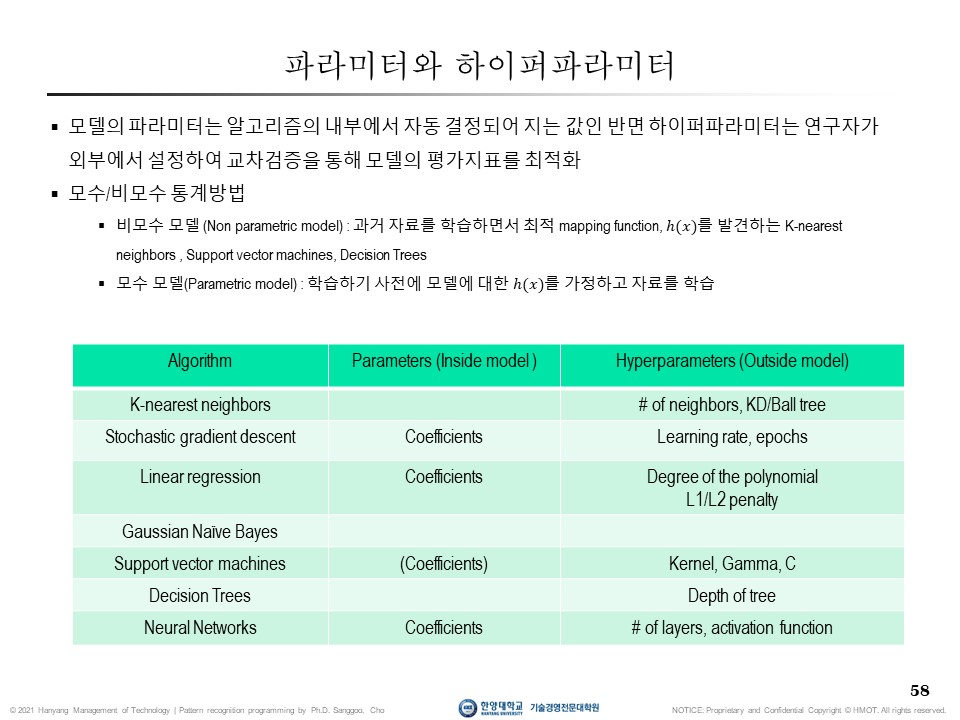

In [40]:
Image(filename='../image/cv/슬라이드58.jpg', width=width, height=height)

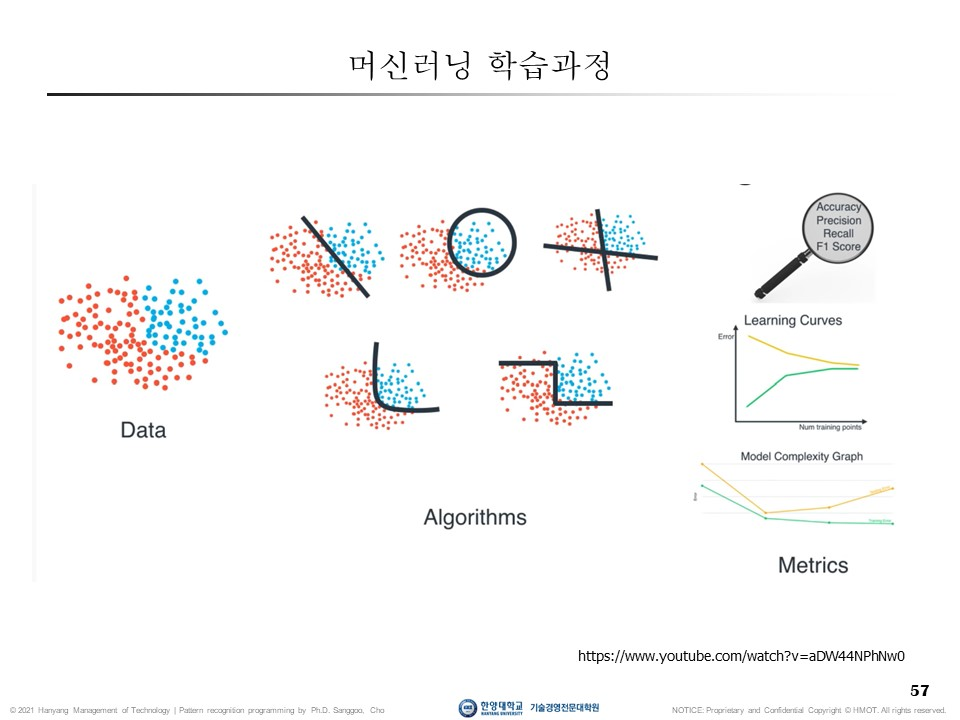

In [41]:
Image(filename='../image/cv/슬라이드57.jpg', width=width, height=height)

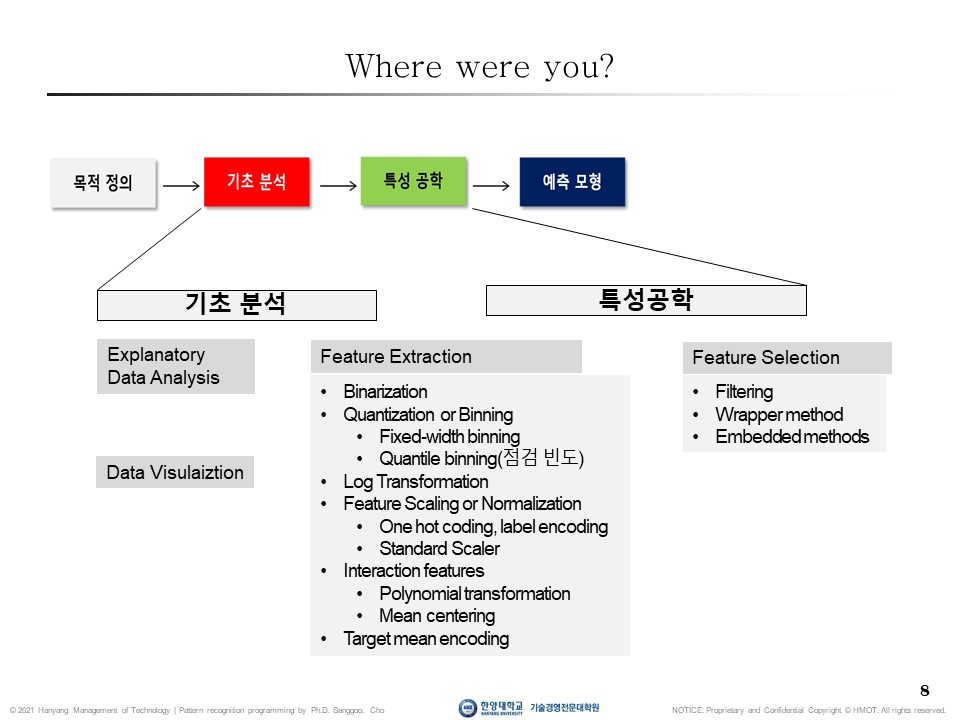

In [42]:
Image(filename='../image/cv/슬라이드8.jpg', width=width, height=height)

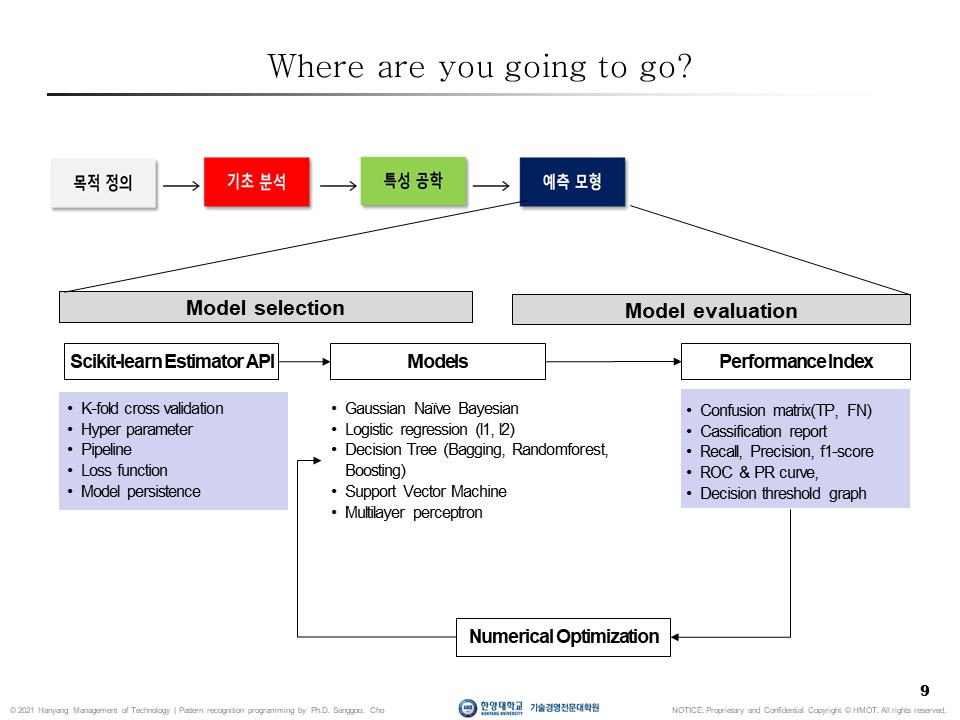

In [43]:
Image(filename='../image/cv/슬라이드9.jpg', width=width, height=height)

# END